In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import numpy as np

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [13]:
from matplotlib import __version__ as mplver


In [14]:
print("matplotlib version is:" , mplver)

matplotlib version is: 3.7.2


## Import preprocessed data

In [15]:
data = pd.read_csv("data_full.csv")

In [16]:
data.set_index("ID", inplace=True)

In [17]:
data.head()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,Active_Period,Contract_Duration,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,2.674242,-0.600000,-0.278298,0,0.0,0.0,1.0,0.0,0.0,...,0.000000,-0.490868,1.15,0.0,3.017065,1.866571,0.763419,9.579365,-0.201465,1
10001,0.500000,0.500000,0.307692,1.182909,0,0.0,0.0,0.0,0.0,0.0,...,0.989071,0.285388,-0.20,0.0,0.607509,0.104392,-0.204771,0.198413,-0.501832,1
10002,0.000000,0.007576,-0.507692,-0.472264,0,0.0,0.0,1.0,0.0,0.0,...,-0.016393,-0.554795,0.50,0.0,0.493905,0.000000,1.208748,0.000000,0.619048,0
10003,-1.166667,-1.492424,-0.276923,-0.030735,0,0.0,0.0,0.0,1.0,0.0,...,0.989071,-0.257991,0.35,0.0,0.176012,0.239981,0.463221,0.992063,-0.300366,0
10004,1.000000,1.780303,2.615385,0.785607,0,0.0,0.0,1.0,0.0,0.0,...,-0.016393,1.152968,-0.50,0.0,-0.611409,0.000000,-0.255467,0.000000,-0.600733,0


In [18]:
data.columns

Index(['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'UseByTime',
       'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
       'TeamActivities', 'RacketActivities', 'CombatActivities',
       'SpecialActivities', 'OtherActivities', 'NumberOfFrequencies',
       'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'Active_Period',
       'Contract_Duration', 'PercentageOfVisits', 'TotalNumberOfActivities',
       'MonthlyValue', 'PercentageOfClasses', 'Freq_Visits_Day',
       'Freq_Classes_Contract', 'Visits_ActivePeriod', 'Gender_Female'],
      dtype='object')

### SOM + K-means clustering

### Frequency Perspective

In [19]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female','UseByTime']

In [20]:
frequency_perspective = [ 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

In [21]:
np.random.seed(42)

sm_frequency = sompy.SOMFactory().build(
    data[frequency_perspective].values, 
    mapsize=[50, 50],  
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=frequency_perspective
)

sm_frequency.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.003000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50



 epoch: 1 ---> elapsed time:  7.428000, quantization error: 1.675041

 epoch: 2 ---> elapsed time:  7.147000, quantization error: 1.675586

 epoch: 3 ---> elapsed time:  7.841000, quantization error: 1.654050

 epoch: 4 ---> elapsed time:  7.654000, quantization error: 1.650963

 epoch: 5 ---> elapsed time:  8.391000, quantization error: 1.648059

 epoch: 6 ---> elapsed time:  7.828000, quantization error: 1.639033

 epoch: 7 ---> elapsed time:  7.081000, quantization error: 1.635237

 epoch: 8 ---> elapsed time:  7.339000, quantization error: 1.632359

 epoch: 9 ---> elapsed time:  7.570000, quantization error: 1.629551

 epoch: 10 ---> elapsed time:  7.197000, quantization error: 1.626640

 epoch: 11 ---> elapsed time:  7.659000, quantization error: 1.623580

 epoch: 12 ---> elapsed time:  8.452000, quantization error: 1.620347

 epoch: 13 ---> elapsed time:  7.636000, quantization error: 1.616917

 epoch: 14 ---> elapsed time:  8.132000, quantization error: 1.613280

 epoch: 15 --->

In [22]:
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[frequency_perspective])
    inertia.append(kmclust.inertia_)  

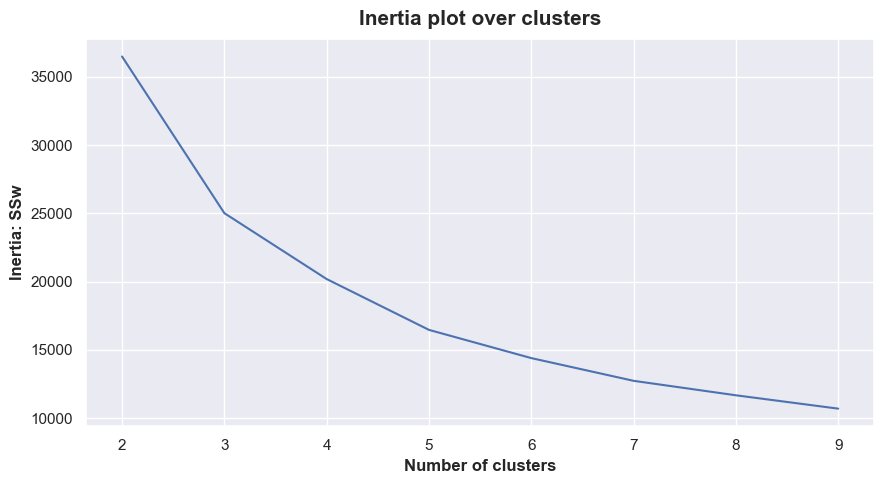

In [23]:
#perform inertia plot
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

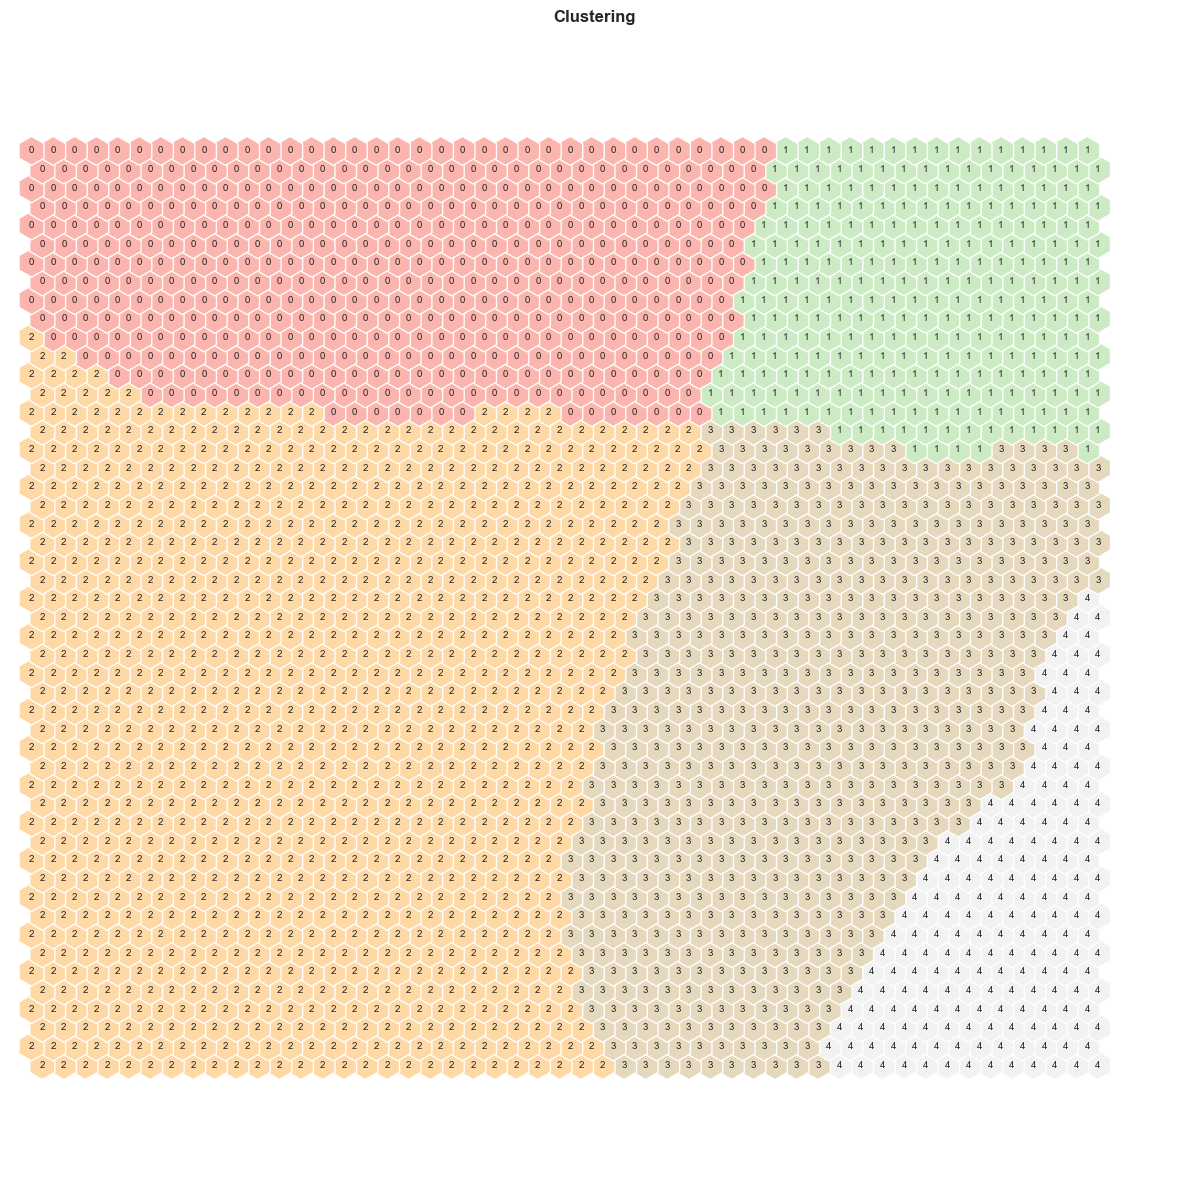

In [24]:
#performing K-Means clustering on top
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels 

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

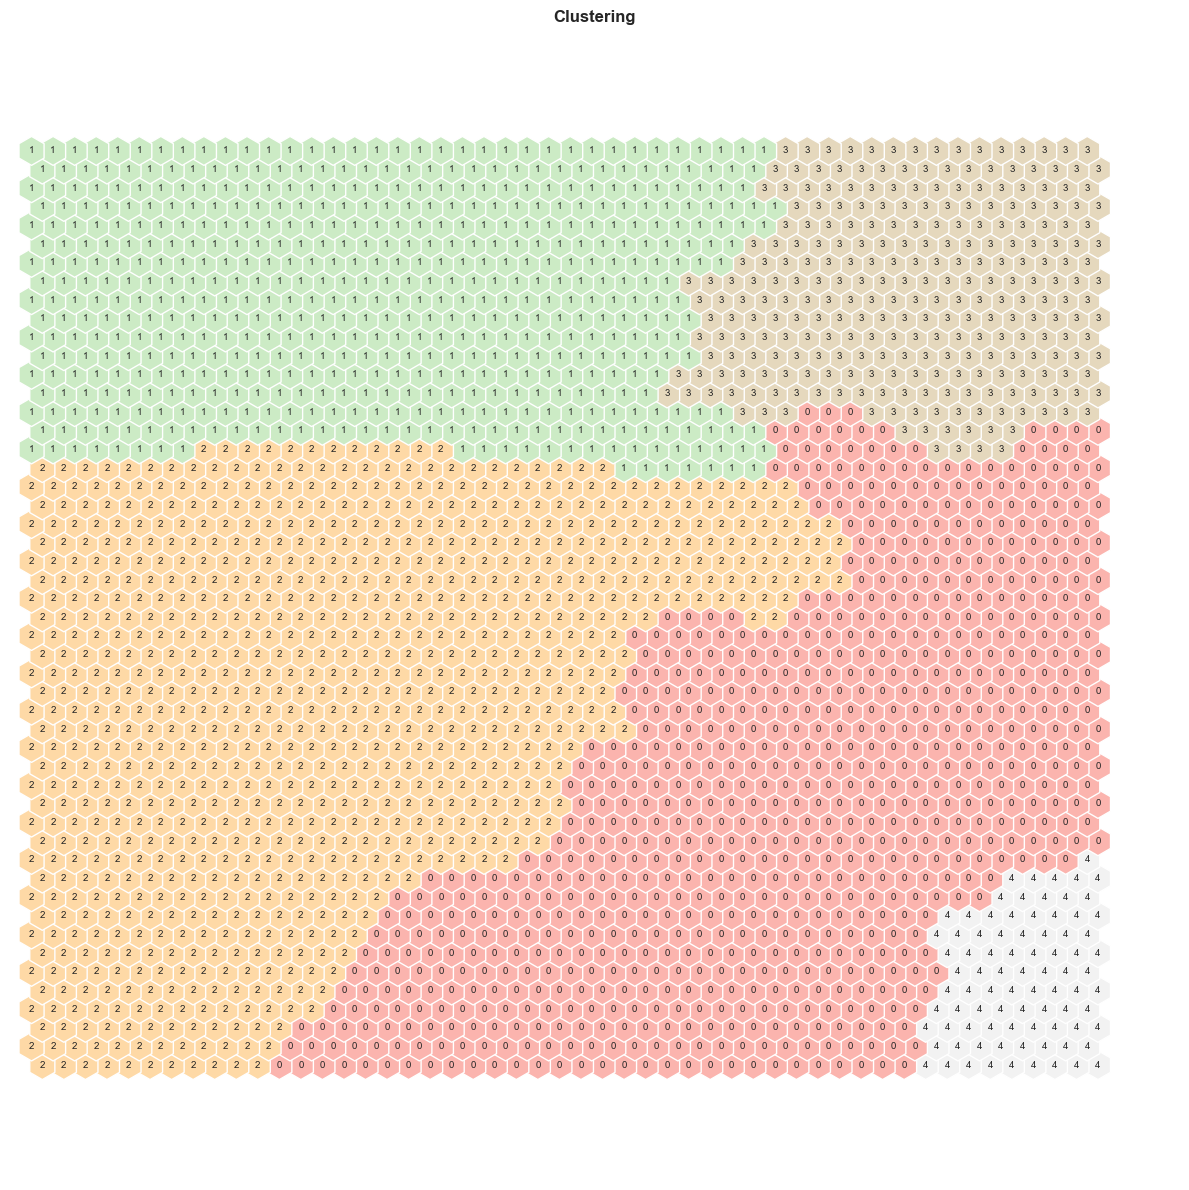

In [25]:
hierclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_frequency.codebook.matrix)
sm_frequency.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_frequency, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [26]:
nodes = sm_frequency.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=frequency_perspective)
df_nodes['label_freq'] = nodeclus_labels
df_nodes

,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,label_freq
0,4.856085,1.410442,0.387514,1.073509,3
1,4.329669,1.392060,0.097724,0.619642,3
2,3.769752,1.441819,-0.045658,0.387812,3
3,3.311271,1.504499,-0.152561,0.129024,3
4,2.931991,1.477472,-0.249227,-0.008412,3
...,...,...,...,...,...
2495,-0.867284,-0.569484,-0.278391,-0.806206,2
2496,-0.869096,-0.571608,-0.318576,-0.808073,2
2497,-0.870354,-0.571298,-0.349967,-0.809347,2
2498,-0.870827,-0.568672,-0.374572,-0.809824,2


In [27]:
bmus_map = sm_frequency.find_bmu(data[frequency_perspective])[0] 
df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU_freq")
)
df_bmus

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,Contract_Duration,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female,BMU_freq
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,2.674242,-0.600000,-0.278298,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.490868,1.15,0.0,3.017065,1.866571,0.763419,9.579365,-0.201465,1.0,363.0
10001,0.500000,0.500000,0.307692,1.182909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285388,-0.20,0.0,0.607509,0.104392,-0.204771,0.198413,-0.501832,1.0,778.0
10002,0.000000,0.007576,-0.507692,-0.472264,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.554795,0.50,0.0,0.493905,0.000000,1.208748,0.000000,0.619048,0.0,1962.0
10003,-1.166667,-1.492424,-0.276923,-0.030735,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.257991,0.35,0.0,0.176012,0.239981,0.463221,0.992063,-0.300366,0.0,726.0
10004,1.000000,1.780303,2.615385,0.785607,0.0,0.0,0.0,1.0,0.0,0.0,...,1.152968,-0.50,0.0,-0.611409,0.000000,-0.255467,0.000000,-0.600733,0.0,749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,-1.492424,-0.584615,4.860757,0.0,0.0,1.0,0.0,0.0,0.0,...,1.997717,0.65,0.0,0.585080,2.056875,0.190855,6.634921,1.000000,0.0,409.0
24938,1.333333,1.045455,-0.030769,0.675600,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.027397,-0.25,0.0,0.756216,0.000000,1.391650,0.000000,0.007326,0.0,2317.0
24939,-0.250000,-0.121212,-0.584615,-0.449775,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.554795,0.85,0.0,0.786446,0.000000,1.208748,0.000000,1.025641,0.0,1959.0


In [28]:
df_final = df_bmus.merge(df_nodes['label_freq'], 'left', left_on="BMU_freq", right_index=True)
df_final

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,2.674242,-0.600000,-0.278298,0.0,0.0,0.0,1.0,0.0,0.0,...,1.15,0.0,3.017065,1.866571,0.763419,9.579365,-0.201465,1.0,363.0,3
10001,0.500000,0.500000,0.307692,1.182909,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.20,0.0,0.607509,0.104392,-0.204771,0.198413,-0.501832,1.0,778.0,1
10002,0.000000,0.007576,-0.507692,-0.472264,0.0,0.0,0.0,1.0,0.0,0.0,...,0.50,0.0,0.493905,0.000000,1.208748,0.000000,0.619048,0.0,1962.0,0
10003,-1.166667,-1.492424,-0.276923,-0.030735,0.0,0.0,0.0,0.0,1.0,0.0,...,0.35,0.0,0.176012,0.239981,0.463221,0.992063,-0.300366,0.0,726.0,1
10004,1.000000,1.780303,2.615385,0.785607,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.50,0.0,-0.611409,0.000000,-0.255467,0.000000,-0.600733,0.0,749.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,-1.492424,-0.584615,4.860757,0.0,0.0,1.0,0.0,0.0,0.0,...,0.65,0.0,0.585080,2.056875,0.190855,6.634921,1.000000,0.0,409.0,3
24938,1.333333,1.045455,-0.030769,0.675600,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,0.0,0.756216,0.000000,1.391650,0.000000,0.007326,0.0,2317.0,0
24939,-0.250000,-0.121212,-0.584615,-0.449775,0.0,0.0,0.0,1.0,0.0,0.0,...,0.85,0.0,0.786446,0.000000,1.208748,0.000000,1.025641,0.0,1959.0,0


In [29]:
df_final.drop(columns='BMU_freq').groupby('label_freq').mean()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,Active_Period,Contract_Duration,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female
label_freq,,,,,,,,,,,,,,,,,,,,,
0,0.479220,0.412903,0.186717,0.285417,0.056780,0.005854,0.147902,0.817366,0.014439,0.001951,...,0.319048,0.218877,0.368537,0.095220,0.045530,0.015002,0.675138,0.072534,0.611689,0.592390
1,0.178589,0.079294,0.988677,0.399213,0.041673,0.008726,0.312321,0.481872,0.087859,0.030841,...,0.479518,0.286593,-0.252610,0.094629,0.034518,0.709275,-0.270086,1.278750,-0.348986,0.615616
2,0.287695,0.277819,1.783815,-0.131908,0.093588,0.015598,0.091854,0.769497,0.022530,0.000000,...,0.173699,0.490187,-0.225910,0.081456,-0.565399,0.000994,-0.627960,0.000385,-0.200157,0.639515
3,-0.419453,-0.549773,-0.277643,1.564388,0.015805,0.001824,0.775076,0.092401,0.071125,0.078419,...,0.349557,0.719343,1.664802,0.082067,0.578716,2.035311,0.247836,6.966223,0.614770,0.579939
4,0.876658,0.702034,-0.464145,0.765425,0.064185,0.010270,0.207959,0.750963,0.015404,0.002567,...,0.189714,0.268694,1.740180,0.109114,0.671519,0.047756,2.717422,0.614432,3.073443,0.491656


In [30]:
cluster_means = df_final.groupby('label_freq').mean()[frequency_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

label_freq,0,1,2,3,4
PercentageOfVisits,0.37,-0.25,-0.23,1.66,1.74
PercentageOfClasses,0.02,0.71,0.00,2.04,0.05
Freq_Visits_Day,0.68,-0.27,-0.63,0.25,2.72
Visits_ActivePeriod,0.61,-0.35,-0.20,0.61,3.07


In [31]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

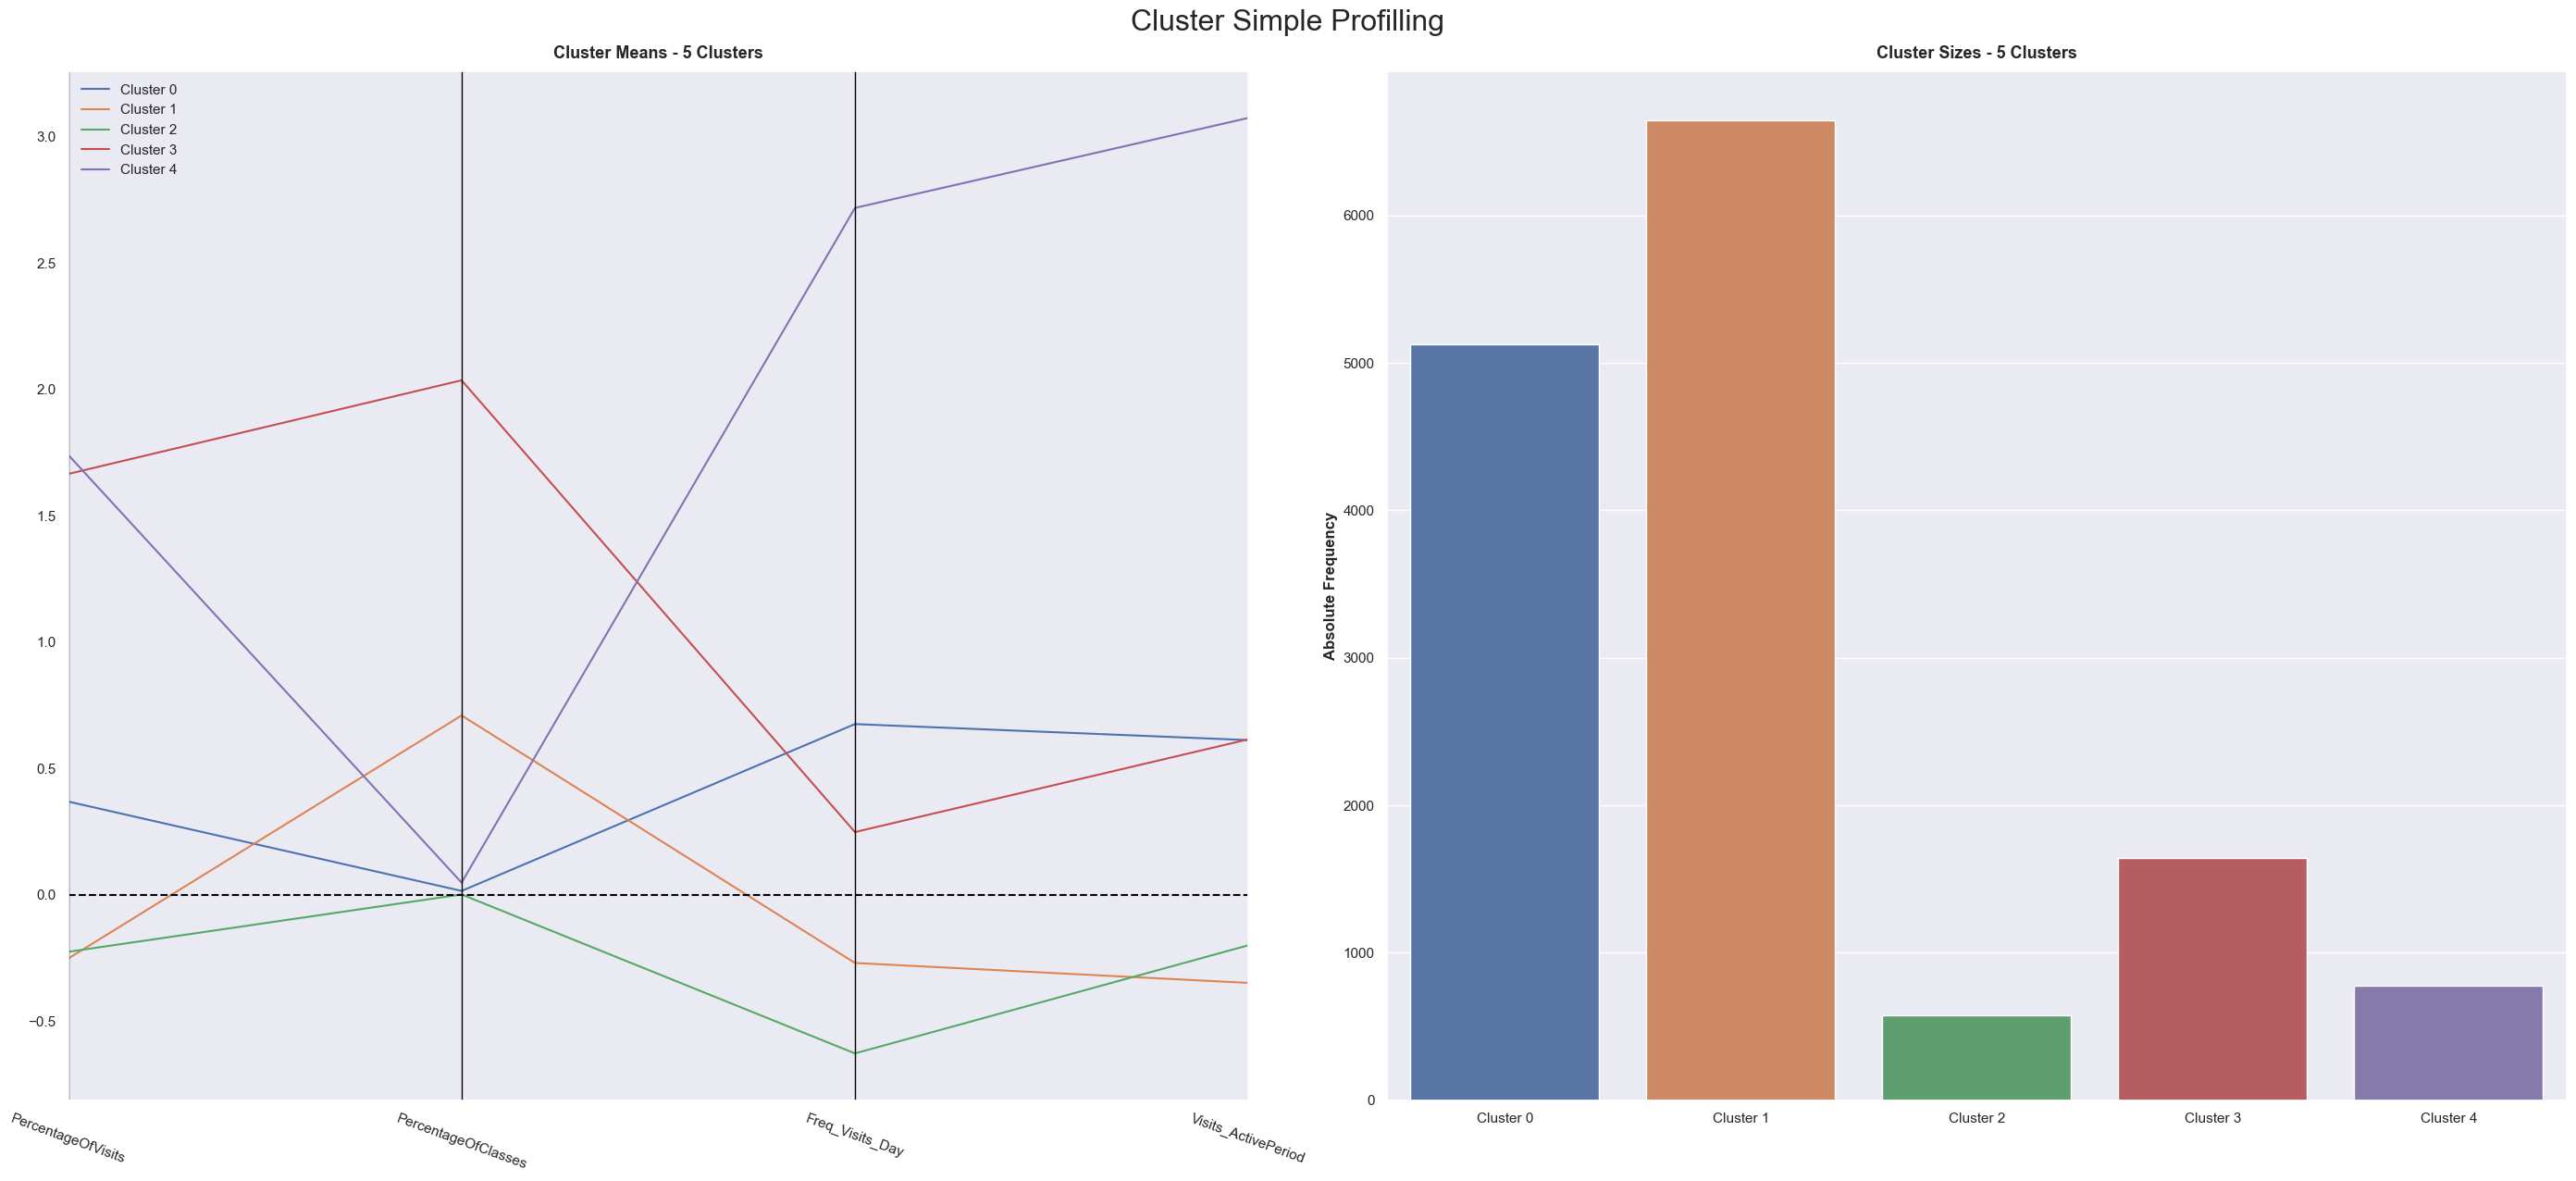

In [32]:
cluster_profiles(
    df = df_final[frequency_perspective + ["label_freq"]], 
    label_columns = ["label_freq"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Demographic Perspective

In [33]:
demographic_perspective = ['Age', 'Active_Period', 'MonthlyValue', 'Contract_Duration']
df_demographic = data[demographic_perspective]

In [34]:
data.value_counts

<bound method DataFrame.value_counts of             Age    Income  DaysWithoutFrequency  LifetimeValue  UseByTime  \
ID                                                                          
10000  3.083333  2.674242             -0.600000      -0.278298          0   
10001  0.500000  0.500000              0.307692       1.182909          0   
10002  0.000000  0.007576             -0.507692      -0.472264          0   
10003 -1.166667 -1.492424             -0.276923      -0.030735          0   
10004  1.000000  1.780303              2.615385       0.785607          0   
...         ...       ...                   ...            ...        ...   
24937 -0.750000 -1.492424             -0.584615       4.860757          0   
24938  1.333333  1.045455             -0.030769       0.675600          0   
24939 -0.250000 -0.121212             -0.584615      -0.449775          0   
24940  2.666667  2.143939             -0.569231       2.342579          0   
24941  0.750000  1.310606           

In [35]:
df_demographic.value_counts

<bound method DataFrame.value_counts of             Age  Active_Period  MonthlyValue  Contract_Duration
ID                                                             
10000  3.083333       0.000000      3.017065          -0.490868
10001  0.500000       0.989071      0.607509           0.285388
10002  0.000000      -0.016393      0.493905          -0.554795
10003 -1.166667       0.989071      0.176012          -0.257991
10004  1.000000      -0.016393     -0.611409           1.152968
...         ...            ...           ...                ...
24937 -0.750000       0.000000      0.585080           1.997717
24938  1.333333      -0.010929      0.756216          -0.027397
24939 -0.250000      -0.016393      0.786446          -0.554795
24940  2.666667       0.000000      0.684544           0.767123
24941  0.750000      -0.016393     -0.127743           2.038813

[14773 rows x 4 columns]>

In [36]:
np.random.seed(42)

sm_demographic = sompy.SOMFactory().build(
    data[demographic_perspective].values, 
    mapsize=[50, 50], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=demographic_perspective
)

sm_demographic.train(n_job=-1, verbose='info', train_rough_len=50, train_finetune_len=50)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 50

 epoch: 1 ---> elapsed time:  7.881000, quantization error: 0.938497

 epoch: 2 ---> elapsed time:  8.370000, quantization error: 1.775370

 epoch: 3 ---> elapsed time:  7.710000, quantization error: 1.756748

 epoch: 4 ---> elapsed time:  9.575000, quantization error: 1.747916

 epoch: 5 ---> elapsed time:  15.354000, quantization error: 1.741325

 epoch: 6 ---> elapsed time:  14.533000, quantization error: 1.737288

 epoch: 7 ---> elapsed time:  13.127000, quantization error: 1.734772

 epoch: 8 ---> elapsed time:  14.328000, quantization error: 1.732573

 epoch: 9 ---> elapsed time:  11.271000, quantization error: 1.730341

 epoch: 10 ---> elapsed time:  11.223000, quantization error: 1.727998

 epoch: 11 ---> elapsed time:  11.634000, quantization error: 1.725521

 epoch: 12 ---> elapsed time:  11.862000, quantization error: 1.722853

 epoch: 

In [ ]:
range_clusters = range(2, 10)

inertia = []
for n_clus in range_clusters:  
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=20, random_state=1)
    kmclust.fit(data[demographic_perspective])
    inertia.append(kmclust.inertia_)  

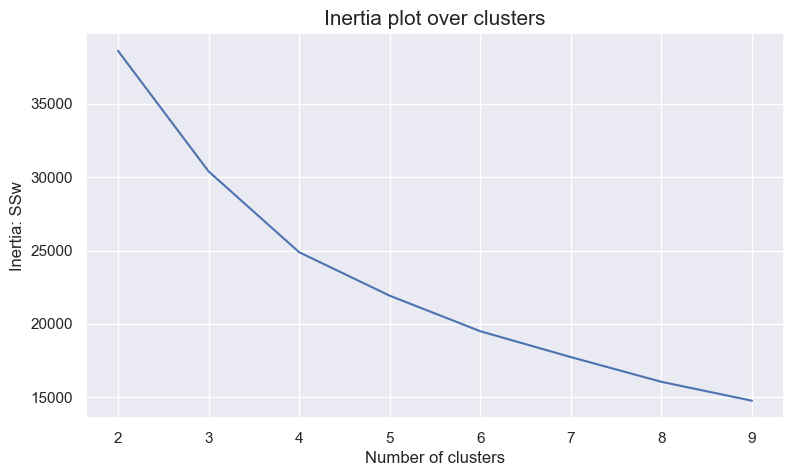

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(range_clusters, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

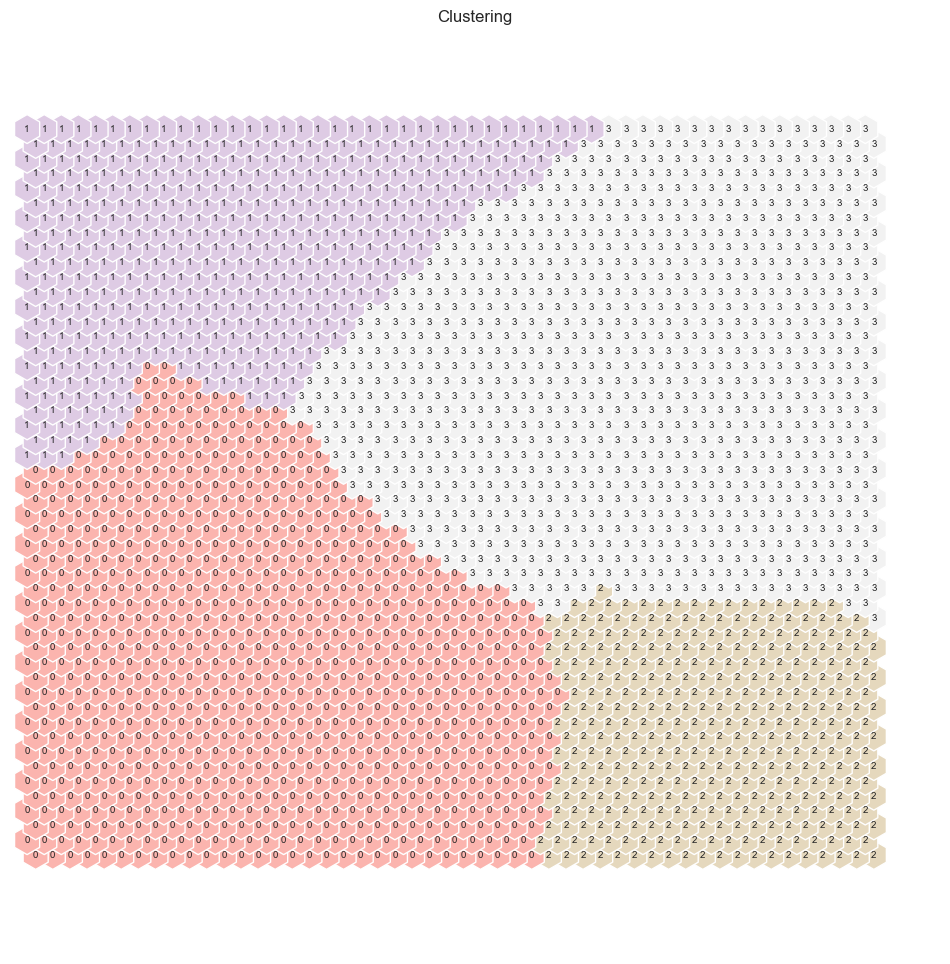

In [ ]:
# Perform K-Means clustering on top of the 2500 units (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = kmeans.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels  # setting the cluster labels of sompy

hits = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

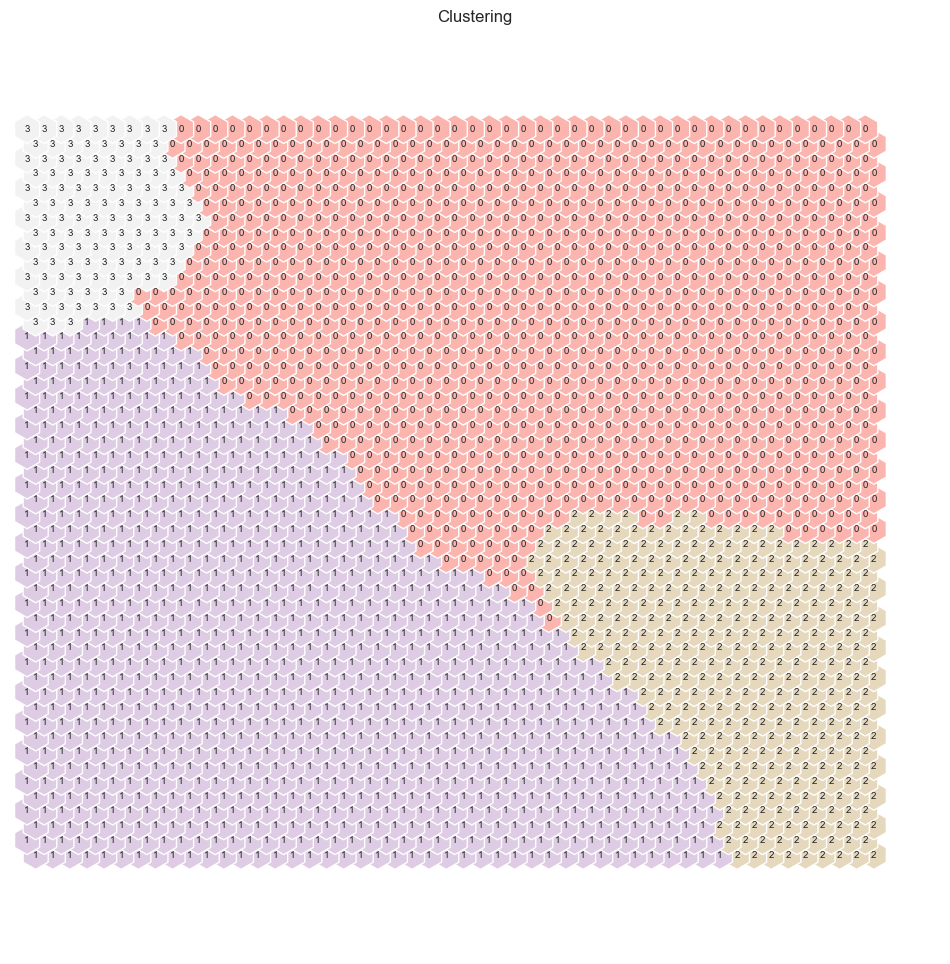

In [ ]:
hierclust = AgglomerativeClustering(n_clusters=4, linkage='ward')
nodeclus_labels = hierclust.fit_predict(sm_demographic.codebook.matrix)
sm_demographic.cluster_labels = nodeclus_labels  

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm_demographic, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
nodes = sm_demographic.codebook.matrix

df_nodes = pd.DataFrame(nodes, columns=demographic_perspective)
df_nodes['label_demographic'] = nodeclus_labels
df_nodes

,Age,Active_Period,MonthlyValue,Contract_Duration,label_demographic
0,-1.566506,-0.704983,1.423992,-0.694391,0
1,-1.572654,-0.705162,1.221717,-0.652288,0
2,-1.514912,-0.705736,1.053151,-0.620743,0
3,-1.382485,-0.707670,0.919483,-0.584553,0
4,-1.169670,-0.711013,0.867627,-0.535001,0
...,...,...,...,...,...
2495,-1.269056,1.113401,-0.145933,-0.234281,1
2496,-1.410221,1.113624,-0.087275,-0.245175,1
2497,-1.471694,1.113593,0.106627,-0.242452,1
2498,-1.537086,1.113397,0.303669,-0.278327,1


In [ ]:
bmus_map = sm_demographic.find_bmu(data[demographic_perspective])[0] 
df_bmus = pd.DataFrame(
    np.concatenate((data, np.expand_dims(bmus_map,1)), axis=1),
    index=data.index, columns=np.append(data.columns,"BMU_demographic")
)
df_bmus

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq,BMU_demographic
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,2.674242,-0.600000,-0.278298,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.017065,1.866571,0.763419,9.579365,-0.201465,1.0,363.0,3.0,39.0
10001,0.500000,0.500000,0.307692,1.182909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.607509,0.104392,-0.204771,0.198413,-0.501832,1.0,778.0,1.0,1599.0
10002,0.000000,0.007576,-0.507692,-0.472264,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.493905,0.000000,1.208748,0.000000,0.619048,0.0,1962.0,0.0,418.0
10003,-1.166667,-1.492424,-0.276923,-0.030735,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.176012,0.239981,0.463221,0.992063,-0.300366,0.0,726.0,1.0,2396.0
10004,1.000000,1.780303,2.615385,0.785607,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.611409,0.000000,-0.255467,0.000000,-0.600733,0.0,749.0,1.0,2458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,-1.492424,-0.584615,4.860757,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.585080,2.056875,0.190855,6.634921,1.000000,0.0,409.0,3.0,1850.0
24938,1.333333,1.045455,-0.030769,0.675600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.756216,0.000000,1.391650,0.000000,0.007326,0.0,2317.0,0.0,789.0
24939,-0.250000,-0.121212,-0.584615,-0.449775,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.786446,0.000000,1.208748,0.000000,1.025641,0.0,1959.0,0.0,215.0


In [ ]:
df_final = df_bmus.merge(df_nodes['label_demographic'], 'left', left_on="BMU_demographic", right_index=True)
df_final

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq,BMU_demographic,label_demographic
ID,,,,,,,,,,,,,,,,,,,,,
10000,3.083333,2.674242,-0.600000,-0.278298,0.0,0.0,0.0,1.0,0.0,0.0,...,3.017065,1.866571,0.763419,9.579365,-0.201465,1.0,363.0,3.0,39.0,0
10001,0.500000,0.500000,0.307692,1.182909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.607509,0.104392,-0.204771,0.198413,-0.501832,1.0,778.0,1.0,1599.0,1
10002,0.000000,0.007576,-0.507692,-0.472264,0.0,0.0,0.0,1.0,0.0,0.0,...,0.493905,0.000000,1.208748,0.000000,0.619048,0.0,1962.0,0.0,418.0,0
10003,-1.166667,-1.492424,-0.276923,-0.030735,0.0,0.0,0.0,0.0,1.0,0.0,...,0.176012,0.239981,0.463221,0.992063,-0.300366,0.0,726.0,1.0,2396.0,1
10004,1.000000,1.780303,2.615385,0.785607,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.611409,0.000000,-0.255467,0.000000,-0.600733,0.0,749.0,1.0,2458.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24937,-0.750000,-1.492424,-0.584615,4.860757,0.0,0.0,1.0,0.0,0.0,0.0,...,0.585080,2.056875,0.190855,6.634921,1.000000,0.0,409.0,3.0,1850.0,2
24938,1.333333,1.045455,-0.030769,0.675600,0.0,0.0,0.0,0.0,0.0,0.0,...,0.756216,0.000000,1.391650,0.000000,0.007326,0.0,2317.0,0.0,789.0,0
24939,-0.250000,-0.121212,-0.584615,-0.449775,0.0,0.0,0.0,1.0,0.0,0.0,...,0.786446,0.000000,1.208748,0.000000,1.025641,0.0,1959.0,0.0,215.0,0


In [ ]:
df_final.drop(columns='BMU_demographic').groupby('label_demographic').mean()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,...,PercentageOfVisits,TotalNumberOfActivities,MonthlyValue,PercentageOfClasses,Freq_Visits_Day,Freq_Classes_Contract,Visits_ActivePeriod,Gender_Female,BMU_freq,label_freq
label_demographic,,,,,,,,,,,,,,,,,,,,,
0,0.429933,0.344306,0.444922,0.043006,0.031225,0.006310,0.207572,0.692768,0.029930,0.008898,...,0.280116,0.066009,0.045857,0.351231,0.279710,0.872908,0.458199,0.633069,1144.795664,0.720757
1,0.216656,0.133639,0.766805,0.459728,0.061154,0.007069,0.298701,0.543646,0.059839,0.036495,...,0.146244,0.090580,-0.143758,0.589487,0.168898,1.414173,-0.035405,0.591649,982.824264,0.870130
2,-0.128470,-0.307254,0.398194,2.830056,0.078689,0.013770,0.616393,0.295738,0.131148,0.013770,...,0.646885,0.223607,-0.014778,1.282069,0.192730,3.219391,0.634989,0.496393,735.111475,1.443934
3,0.022951,-0.026943,-0.286742,-0.171008,0.013211,0.005081,0.288618,0.541667,0.051829,0.048780,...,0.575203,0.085366,2.261400,0.472906,0.789479,1.933395,0.528552,0.574187,1250.840447,0.798780


In [ ]:
cluster_means = df_final.groupby('label_demographic').mean()[demographic_perspective].T
cluster_means.style.format(precision=2).background_gradient(axis=1)

label_demographic,0,1,2,3
Age,0.43,0.22,-0.13,0.02
Active_Period,-0.01,0.90,-0.00,0.20
MonthlyValue,0.05,-0.14,-0.01,2.26
Contract_Duration,-0.06,0.43,1.92,-0.48


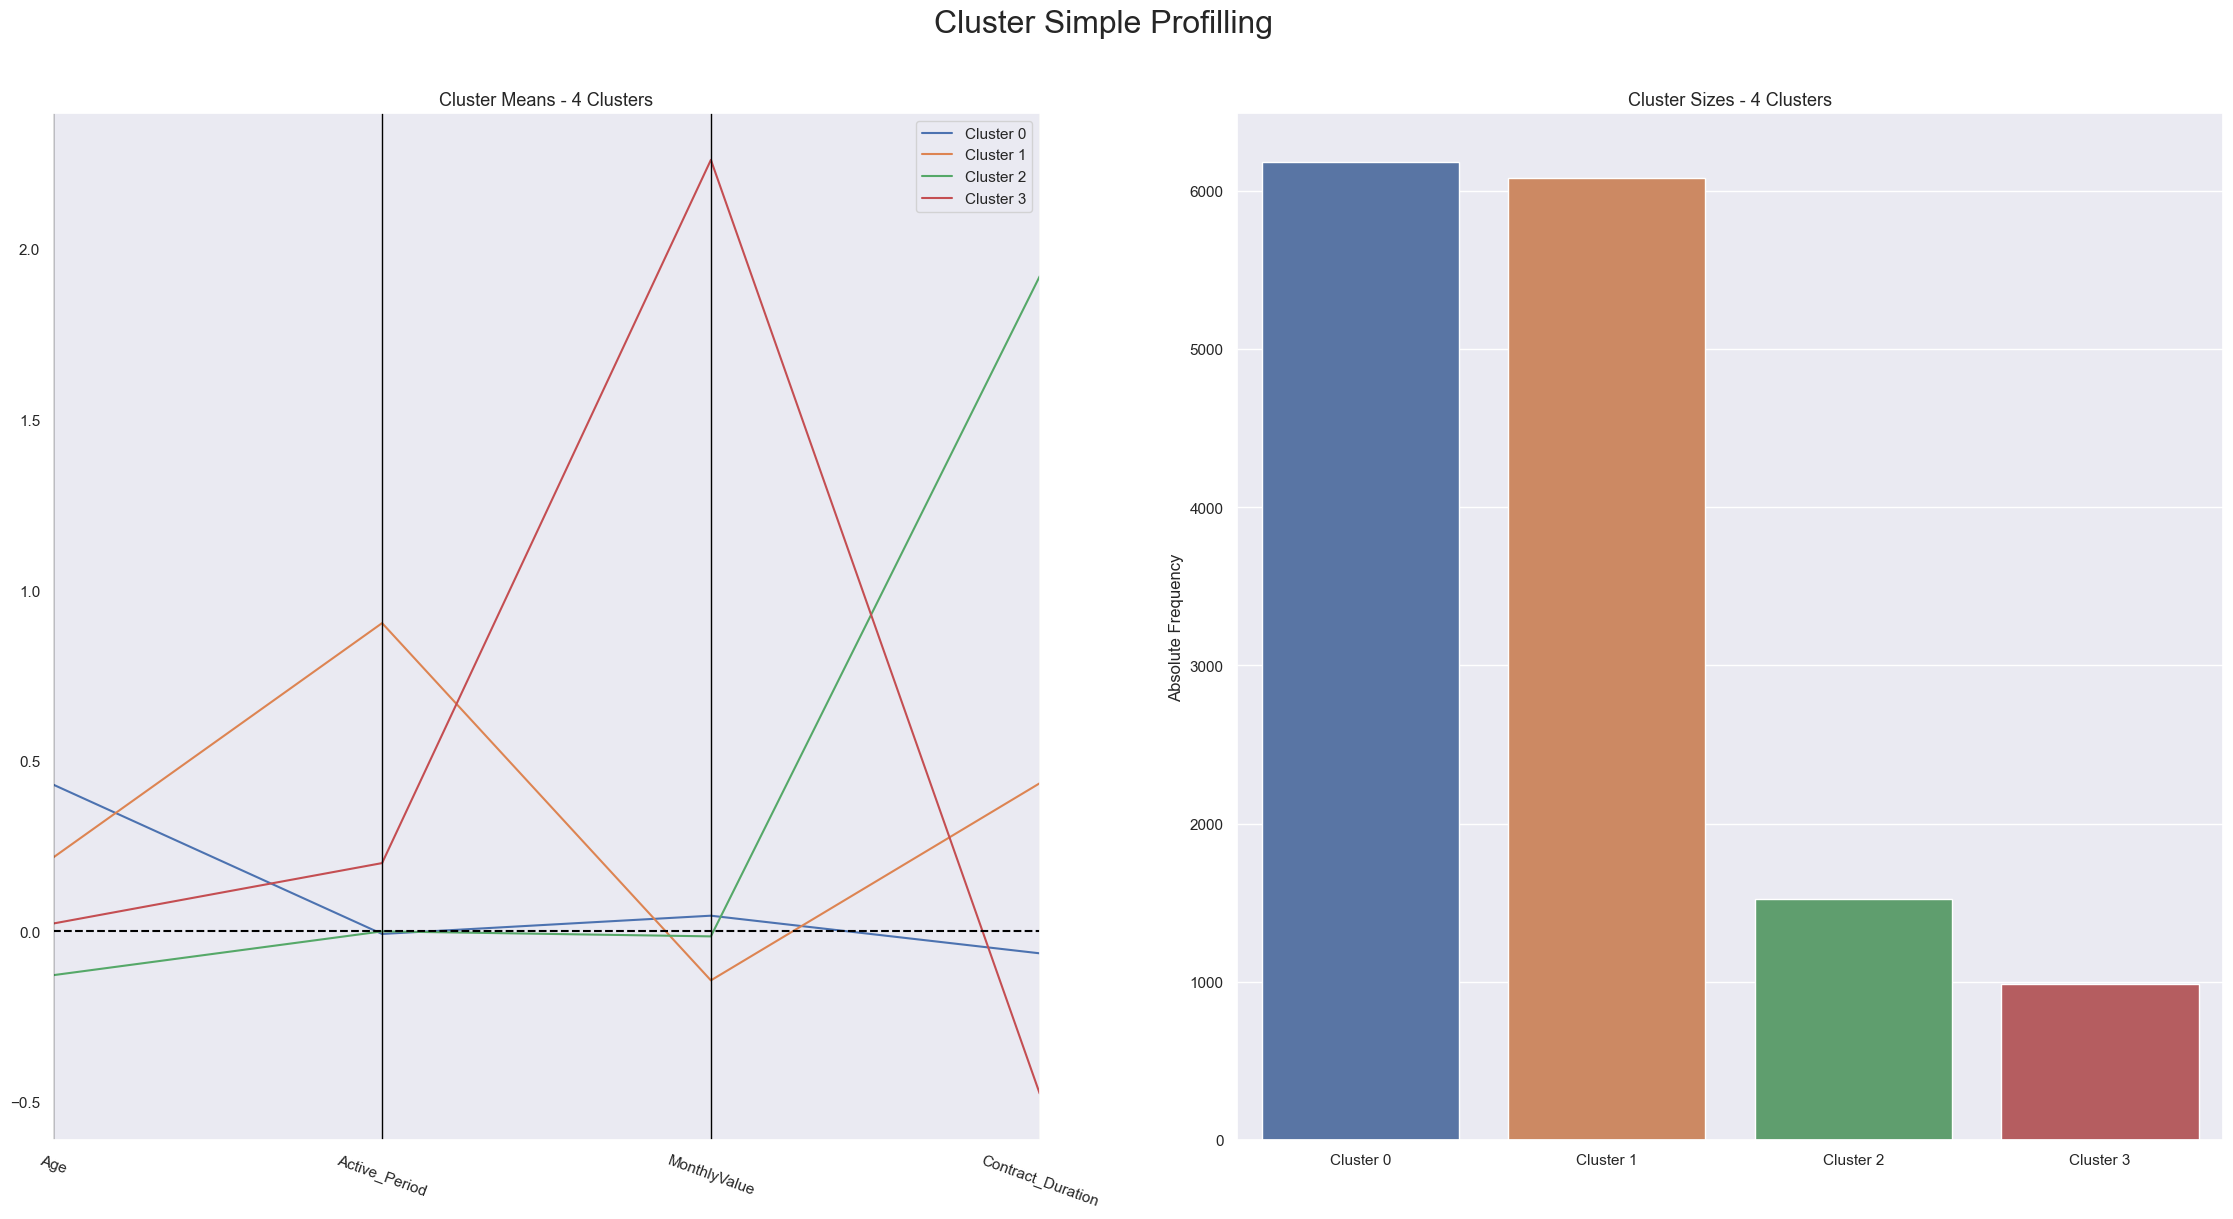

In [ ]:
cluster_profiles(
    df = df_final[demographic_perspective + ["label_demographic"]], 
    label_columns = ["label_demographic"], 
    figsize = (28, 13), 
    compar_titles = [""]
)

### Merge Perspectives

In [ ]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod']

In [ ]:
pd.crosstab(df_final['label_freq'],
            df_final['label_demographic'])

label_demographic,0,1,2,3
label_freq,,,,
0.0,2958,2063,396,487
1.0,2454,3276,576,341
2.0,306,215,33,23
3.0,463,529,520,133


In [ ]:
df_centroids = df_final.groupby(['label_freq', 'label_demographic'])\
    [metric_features].mean()


# Clusters with low frequency to be merged:
to_merge = [(2,3), (2,2), (2,1), (3,3)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(2, 0): (2.0, 3), (3, 1): (3.0, 0), (3, 2): (3.0, 1), (3, 3): (3.0, 0)}

In [ ]:
df_ = df_final.copy()

for source, target in source_target.items():
    mask = (df_['label_freq']==source[0]) & (df_['label_demographic']==source[1])
    df_.loc[mask, 'label_freq'] = target[0]
    df_.loc[mask, 'label_demographic'] = target[1]


pd.crosstab(df_['label_freq'],
            df_['label_demographic'])

df = df_.copy()

## Merging using Hierarchical clustering:

In [ ]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['label_demographic', 'label_freq'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         0.612125          -0.056753            0.563556   
                  1.0         0.359006          -0.089823           -0.250509   
                  3.0        -0.224370           0.200424            1.698089   
1                 0.0         0.414526           0.402060            0.431774   
                  1.0         0.139677           0.395052           -0.264759   
                  2.0         0.227132           1.036678           -0.205349   
                  3.0        -0.841506           1.842005            1.592788   
2                 0.0         0.985480           2.302569            0.753283   
                  1.0        -0.297598           1.712452           -0.229948   
                  2.0         0.691919           2.182994           -0.230303   
3                 0.0         0.170089          -0.497604            0.797331   
                  1.0         0.058407          -0.455001           -0.189296   
                  2.0         0.286727          -0.036738           -0.238906   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.015142         0.861647   
                  1.0                    0.490375        -0.301880   
                  3.0                    2.006999         0.317975   
1                 0.0                    0.014350         0.895810   
                  1.0                    0.760716        -0.257819   
                  2.0                    0.002255        -0.624384   
                  3.0                    2.096564         0.096095   
2                 0.0                    0.044197         1.014705   
                  1.0                    1.471096        -0.235115   
                  2.0                    0.002691        -0.680402   
3                 0.0                    0.045566         1.598201   
                  1.0                    0.503566        -0.218198   
                  2.0                    0.000000        -0.625037   

                              Visits_ActivePeriod  
label_demographic label_freq                       
0                 0.0                    1.081792  
                  1.0                   -0.277499  
                  3.0                    0.496234  
1                 0.0                    0.521054  
                  1.0                   -0.410180  
                  2.0                   -0.177392  
                  3.0                    0.871217  
2                 0.0                    1.827071  
                  1.0                   -0.356806  
                  2.0                   -0.081030  
3                 0.0                    1.089777  
                  1.0                   -0.262329  
                  2.0                   -0.226984

In [ ]:
#use Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

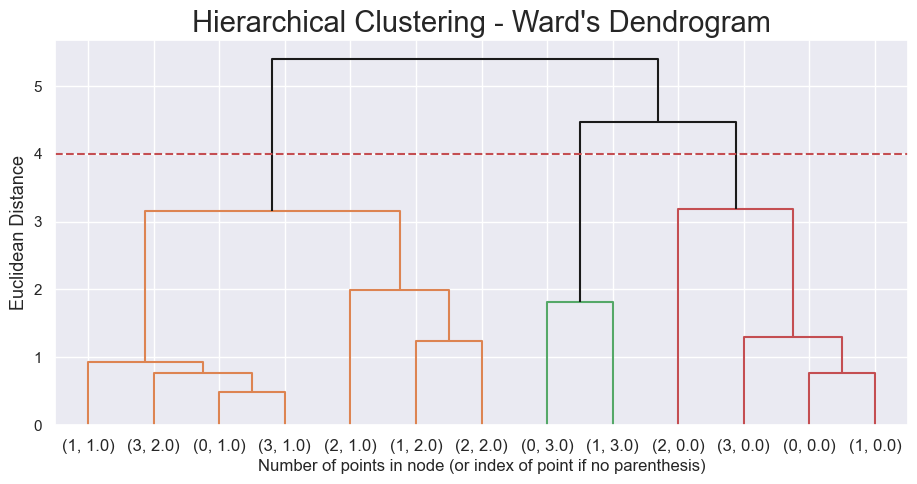

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=3
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids 

Age  Contract_Duration  PercentageOfVisits  \
label_demographic label_freq                                                    
0                 0.0         0.612125          -0.056753            0.563556   
                  1.0         0.359006          -0.089823           -0.250509   
                  3.0        -0.224370           0.200424            1.698089   
1                 0.0         0.414526           0.402060            0.431774   
                  1.0         0.139677           0.395052           -0.264759   
                  2.0         0.227132           1.036678           -0.205349   
                  3.0        -0.841506           1.842005            1.592788   
2                 0.0         0.985480           2.302569            0.753283   
                  1.0        -0.297598           1.712452           -0.229948   
                  2.0         0.691919           2.182994           -0.230303   
3                 0.0         0.170089          -0.497604            0.797331   
                  1.0         0.058407          -0.455001           -0.189296   
                  2.0         0.286727          -0.036738           -0.238906   

                              PercentageOfClasses  Freq_Visits_Day  \
label_demographic label_freq                                         
0                 0.0                    0.015142         0.861647   
                  1.0                    0.490375        -0.301880   
                  3.0                    2.006999         0.317975   
1                 0.0                    0.014350         0.895810   
                  1.0                    0.760716        -0.257819   
                  2.0                    0.002255        -0.624384   
                  3.0                    2.096564         0.096095   
2                 0.0                    0.044197         1.014705   
                  1.0                    1.471096        -0.235115   
                  2.0                    0.002691        -0.680402   
3                 0.0                    0.045566         1.598201   
                  1.0                    0.503566        -0.218198   
                  2.0                    0.000000        -0.625037   

                              Visits_ActivePeriod  hclust_labels  
label_demographic label_freq                                      
0                 0.0                    1.081792              1  
                  1.0                   -0.277499              3  
                  3.0                    0.496234              0  
1                 0.0                    0.521054              1  
                  1.0                   -0.410180              3  
                  2.0                   -0.177392              2  
                  3.0                    0.871217              0  
2                 0.0                    1.827071              0  
                  1.0                   -0.356806              2  
                  2.0                   -0.081030              2  
3                 0.0                    1.089777              1  
                  1.0                   -0.262329              3  
                  2.0                   -0.226984              3

In [ ]:
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['label_demographic'], row['label_freq'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,-0.146864,1.026525,1.487947,1.648990,0.396626,0.849984
1,0.499032,0.076115,0.534867,0.017535,0.939567,0.872476
2,-0.121056,1.554972,-0.223544,1.029035,-0.354517,-0.298948
3,0.227005,0.141644,-0.253945,0.604250,-0.291480,-0.342010


In [ ]:
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['label_demographic'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['label_freq'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='label_demographic', columns='label_freq')

label_freq,0.0,2.0
label_demographic,,
2,2041,824
3,5508,6400


In [ ]:
df = df_.copy()

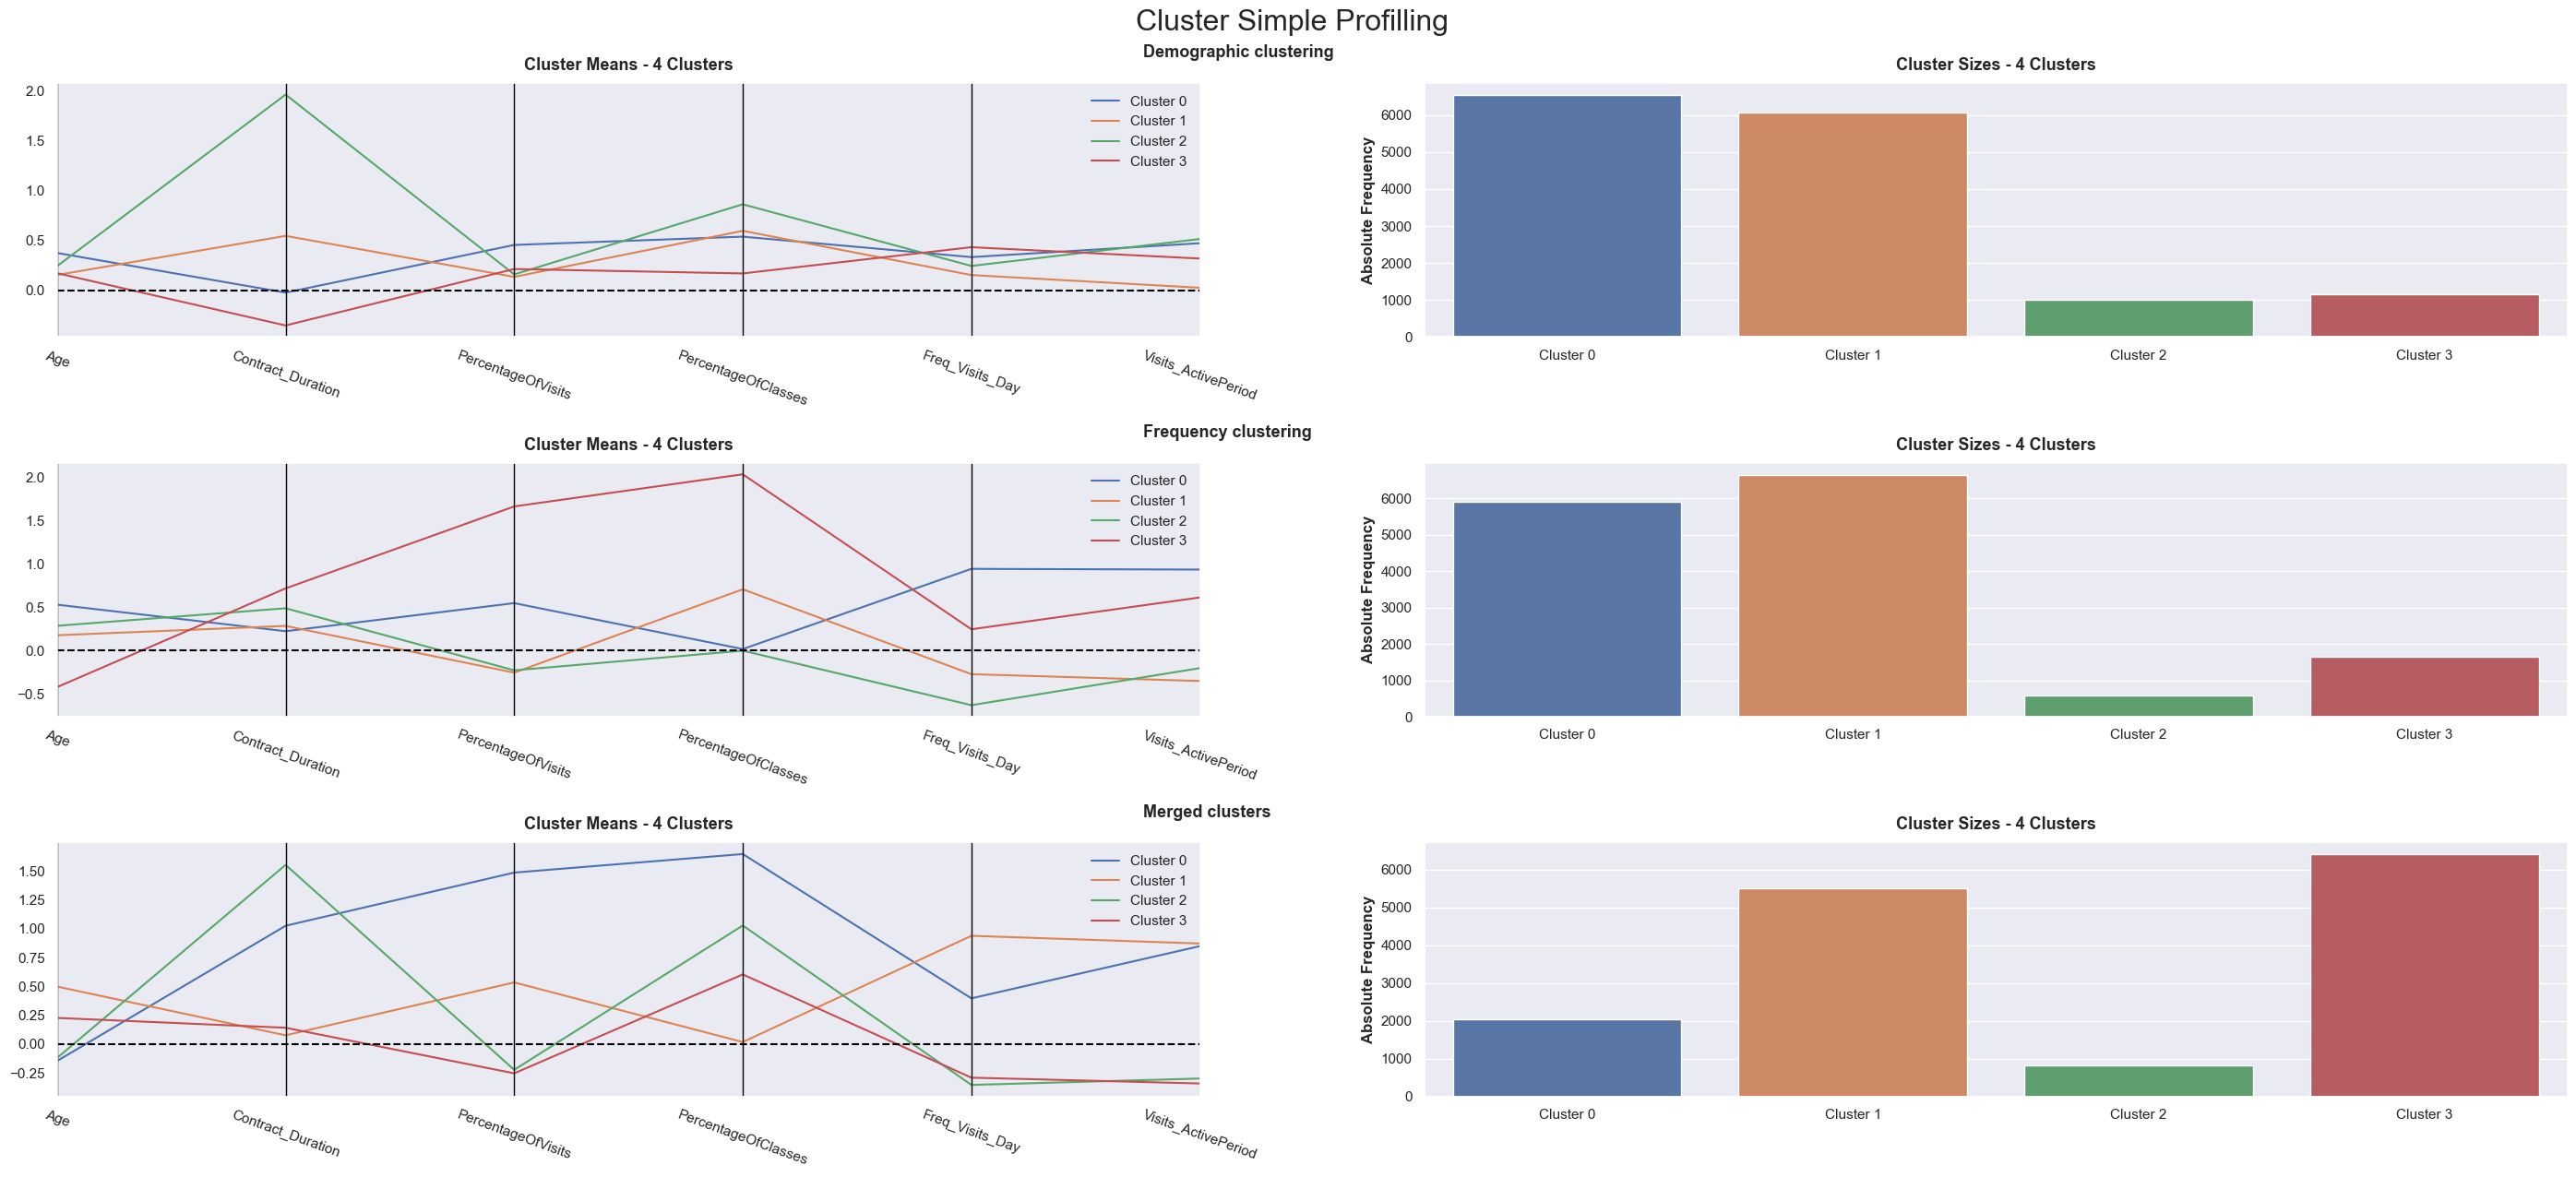

In [ ]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['label_demographic', 'label_freq', 'merged_labels']], 
    label_columns = ['label_demographic', 'label_freq', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [ ]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [ ]:
sst = get_ss(df[metric_features])  
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss) 
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3025


In [ ]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [ ]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod
merged_labels,,,,,,
0,-0.03,0.27,-0.04,0.10,-0.08,-0.06
1,0.72,0.09,0.71,0.01,1.35,1.17
2,-0.18,0.25,0.66,0.41,0.11,0.25
3,0.10,0.19,0.07,0.00,0.10,0.18
4,0.38,0.19,-0.39,0.47,-0.49,-0.53


In [ ]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [ ]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,0.16,0.08,0.04,0.17,0.05,0.08,0.03,0.00
1,0.30,0.18,0.53,0.09,0.03,0.22,0.49,0.04
2,0.03,0.29,0.02,0.15,0.37,0.04,0.10,0.25
3,0.06,0.03,0.03,0.02,0.00,0.04,0.12,0.00
4,0.46,0.41,0.39,0.57,0.55,0.62,0.27,0.71


In [ ]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [ ]:
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Dropout,Gender_Female,UseByTime
merged_labels,,,
0,0.05,0.05,0.10
1,0.38,0.37,0.38
2,0.06,0.11,0.04
3,0.02,0.02,0.11
4,0.49,0.45,0.38
